In [1]:
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
import rdkit.Chem.Descriptors as desc
import rdkit.Chem as Chem

In [5]:
ligands = pd.read_csv('../data/fragments.csv')['smiles']
docked_df = pd.read_csv('../out/pymol/output_energies_docked_2g5r_2.csv')
avg_docked_energy = docked_df.mean(axis=1)
best_docked_energy = docked_df['0']
y = pd.read_csv('../data/test.csv')['G'][:len(docked_df)]
mol_wt = [desc.ExactMolWt(Chem.MolFromSmiles(i)) for i in ligands][:len(docked_df)]
merge_df = pd.DataFrame({'avg':avg_docked_energy, 'best':best_docked_energy, 'y':y, 'mol_wt':mol_wt})
# merge_df = merge_df[(np.abs(st.zscore(merge_df)) < 3).all(axis=1)]


# df = df[(np.abs(st.zscore(df)) < 3).all(axis=1)]
# df2 = df.drop(['y'], axis=1)
# y = list(df['y'])

In [5]:
drop_rows = [92, 90, 85, 84, 83, 81, 79, 77, 74, 72, 65, 64, 63, 62, 58, 56, 55, 53, 52, 50, 47, 39, 36, 35, 34, 31, 30, 29, 27, 23, 22, 1, 16, 14, 11, 10, 75, 33, 59, 60, 68, 88, 0, 20, 76, 69, 71, 32]
merge_df_dropped = merge_df.drop(drop_rows)
print(len(merge_df_dropped.index))


46


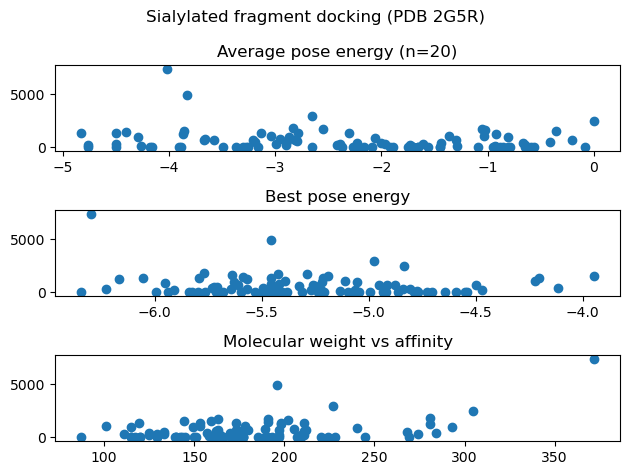

In [6]:
fig, axs = plt.subplots(3)
fig.suptitle('Sialylated fragment docking (PDB 2G5R)')
axs[0].scatter(merge_df['avg'], merge_df['y'])
axs[0].set_title("Average pose energy (n=20)")
axs[1].scatter(merge_df['best'], merge_df['y'])
axs[1].set_title("Best pose energy")
axs[2].scatter(merge_df['mol_wt'], merge_df['y'])
axs[2].set_title("Molecular weight vs affinity")
fig.tight_layout()


NameError: name 'merge_df_dropped' is not defined

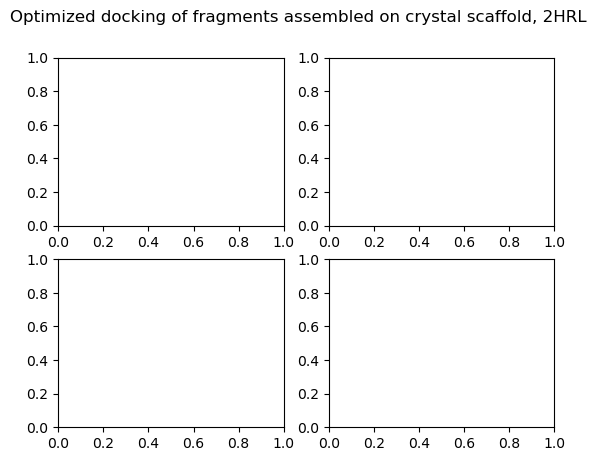

In [3]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Optimized docking of fragments assembled on crystal scaffold, 2HRL')
axs[0, 0].scatter(merge_df_dropped['avg'], merge_df_dropped['y'])
axs[0, 0].set_title("Average pose energy (n=20)")
axs[1, 0].scatter(merge_df_dropped['best'], merge_df_dropped['y'])
axs[1, 0].set_title("Best pose energy")
axs[0, 1].scatter(merge_df_dropped['optimized'], merge_df_dropped['y'])
axs[0, 1].set_title("Optimized energy prior to docking")
fig.tight_layout()



In [7]:
r, p = st.pearsonr(merge_df['avg'], merge_df['y'])
print(f"Average docking energy vs. experimental affinity\ncorrelation: {r}\nP-value:        {p}\nR squared:    {r**2}")

r, p = st.pearsonr(merge_df['best'], merge_df['y'])
print(f"Best docking energy vs. experimental affinity\ncorrelation: {r}\nP-value:        {p}\nR squared:    {r**2}")

r, p = st.pearsonr(merge_df['mol_wt'], merge_df['y'])
print(f"Molecular weight vs. experimental affinity\ncorrelation: {r}\nP-value:        {p}\nR squared:    {r**2}")


# r, p = st.pearsonr(merge_df_dropped['optimized'], merge_df_dropped['y'])
# print(f"Optimized energy vs. experimental affinity\ncorrelation: {r}\nP-value:        {p}\nR squared:    {r**2}")


Average docking energy vs. experimental affinity
correlation: -0.18192969370856757
P-value:        0.07926776437284414
R squared:    0.03309841345289321
Best docking energy vs. experimental affinity
correlation: -0.14599614397908509
P-value:        0.1602945429461008
R squared:    0.021314874056761742
Molecular weight vs. experimental affinity
correlation: 0.45116881723159774
P-value:        5.0258330307152354e-06
R squared:    0.20355330164215885
